## Score Analysis

In [23]:
import pandas as pd 
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')

df = pd.DataFrame(data)
df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [55]:
# Task 1 

# Declaring three list to store calculted mean, median and mode
Mean = []
Median = []
Mode = []

#Iterating each column of DataFrame 
for col in df:
    Mean.append(df.loc[:, col].mean())
    Median.append(df.loc[:, col].median())
    Mode.append(st.mode(df[col]))

row_head = ['Mean', 'Median', 'Mode']
col_head = ['Statistics', 'Python', 'Tableau']

# create a new data frame 
d_data = pd.DataFrame([Mean, Median, Mode], columns = col_head)

# Inserting a new column 'Measures' at the beginning of the data frame with 3 measures
d_data.insert(0, "Measures", row_head, True)

d_data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


## Interpretation: 
 Students have performed best in Python subject as it has the highest average score.


In [54]:
# Task 2

# Declaring three list to store calculted mean, median and mode
Mean = []
Var = []
CV = []

#Iterating each column of DataFrame 
for col in df:
    col_mean = df.loc[:, col].mean()
    Mean.append(col_mean)
    col_sd = df.loc[:, col].std()
    CV.append(col_sd/col_mean*100)
    Var.append(st.variance(df.loc[:, col]))

row_head = ['Mean', 'Variance', 'Coefficient of Variation']
col_head = ['Statistics', 'Python', 'Tableau']

# create a new data frame 
school = pd.DataFrame([Mean, Var, CV], columns = col_head)

# Inserting a new column 'Measures' at the beginning of the data frame with 3 measures
school.insert(0, "Measures", row_head, True)

school



,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Variance,52.361515,18.883232,53.595556
2,Coefficient of Variation,11.883931,5.309731,10.762862


## Interpretation:
   1. Statistics subject shows the best performance of the class
   2. Variance of statistics is closer to the mean which means that the data/marks is less spread out.
   3. Python subject has more spread of data as variance is far away from mean which means that there are students who
      scored very low marks and very high marks as well. 

In [56]:
# Task 3

for sub in df:
    LO= []# lower outliers 
    UO= []# upper outliers
    subject = pd.Series(df[sub])
    
    Min = min(subject)
    Max = max(subject)
    Range = Max-Min
    
    Q1 = subject.quantile(0.25)
    Q3 = subject.quantile(0.75)
    IQR = Q3 - Q1
    UF = Q3 +1.5*IQR
    LF = Q1 -1.5*IQR
    
    for i in df[sub]:
        if (i<LF):
            LO.append(i)
        elif (i>UF):
            UO.append(i)
    
    if (sub == 'Statistics'):
        Statistics = ['Statistics', Min, Max, Range, Q1, Q3, IQR, LF, UF, [LO, UO]]
    elif (sub == 'Python'):
        Python = ['Python', Min, Max, Range, Q1, Q3, IQR, LF, UF, [LO, UO]]
    else:
        Tableau = ['Tableau', Min, Max, Range, Q1, Q3, IQR, LF, UF, [LO, UO]]
col_names = ['Company', 'Min', 'Max', 'Range', 'Q1', 'Q3','IQR', 'Lower fence', 'Upper fence', 'Outlier' ] 

subj = pd.DataFrame([Statistics, Python, Tableau], columns = col_names )

subj  

,Company,Min,Max,Range,Q1,Q3,IQR,Lower fence,Upper fence,Outlier
0,Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,66.000,98.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125,"[[45, 50, 50, 50, 46, 46], []]"


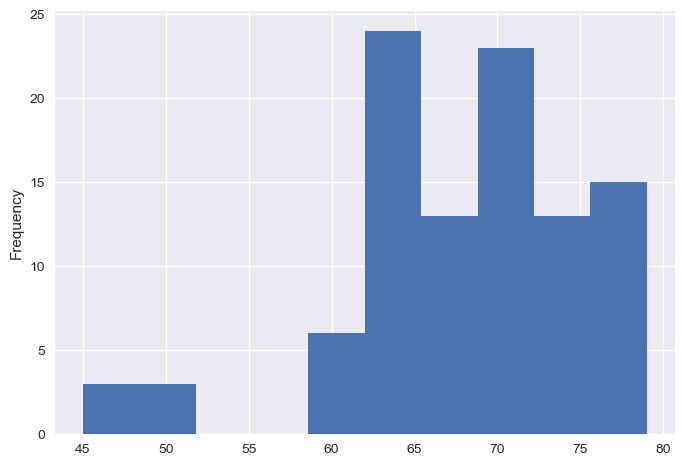

In [37]:
df['Tableau'].plot.hist()
plt.show()

## Interpretation:
    1. Tableau subject has Lower outliers.
    2. Tableau marks are left skewed as shown in graph.

In [46]:
# Task 4

#Separting each company's salary in different list

stat_data = df['Statistics'].tolist()
python_data = df['Python'].tolist()
tab_data = df['Tableau'].tolist()

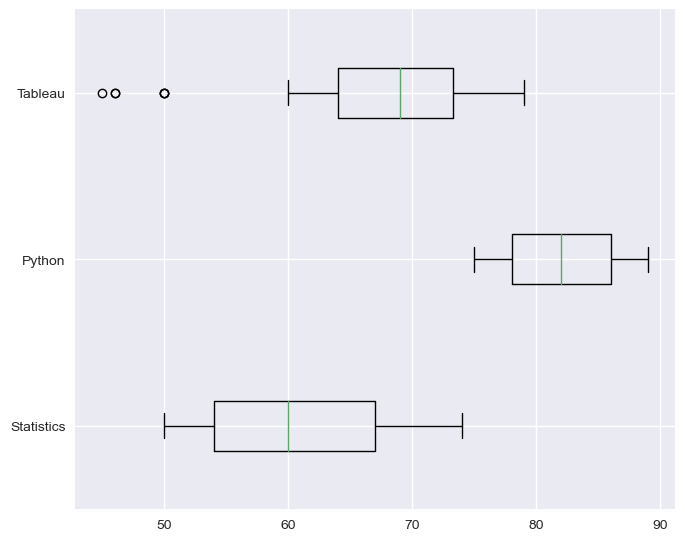

In [48]:
#Creating boxplots of 3 groups of scores
fig = plt.figure(figsize= (6,5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating boxplot of 3 group of salaries 
plt.boxplot([stat_data, python_data, tab_data], vert = 0)

# setting y-axis label 
ax.set_yticklabels(['Statistics','Python','Tableau'])

# show the final plot 
plt.show()

# Interpretation:
    Tableau subject scores are the most skewed with left skewness.

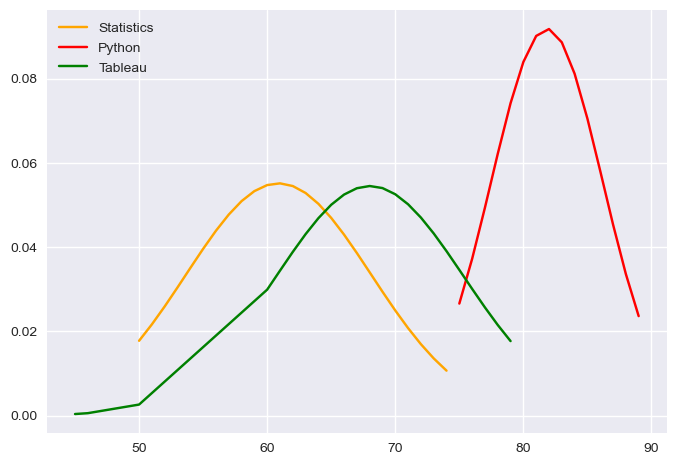

In [49]:
# Task 5

from scipy.stats import norm

# sorting data 
stat_data = sorted(stat_data)
python_data = sorted(python_data)
tab_data = sorted(tab_data)

# calculating the mean and sd 
S_mean = st.mean(stat_data)
S_sd = st.stdev(stat_data)
P_mean = st.mean(python_data)
P_sd = st.stdev(python_data)
T_mean = st.mean(tab_data)
T_sd = st.stdev(tab_data)

# drawing the plots 
plt.plot(stat_data, norm.pdf(stat_data, S_mean, S_sd), color = 'orange', label = 'Statistics')
plt.plot(python_data, norm.pdf(python_data, P_mean, P_sd), color = 'red', label = 'Python')
plt.plot(tab_data, norm.pdf(tab_data, T_mean, T_sd), color = 'green', label = 'Tableau')


plt.legend()
plt.show()

In [53]:
# Calculating Kurtosis of the scores of three subjects

from scipy.stats import kurtosis

print('Kurtosis of Statistics: ', kurtosis(stat_data))
print('Kurtosis of Python: ', kurtosis(python_data))
print('Kurtosis of Tableau: ', kurtosis(tab_data))

Kurtosis of Statistics:  -1.2890343729055107
Kurtosis of Python:  -1.2748529079288784
Kurtosis of Tableau:  1.442459054422362


## Interpretation:
    1. As Kurtosis values are less than 3, all the subjects are low or flatter peak also called as Platykurtic.
    2. Python score is light tailed.
    3. Tableau score is heavy tailed. 